# D-Wave Quantum Annealer Graph Cut Demo

In this demo we will use a quantum annealer (a special type of quantum computers) from D-Wave online, to approximate a solution to combinatorial optimization problems for graph analytics.

In order to access D-Wave quantum annealer from a Notebook (Jupyter or Colab) first we need to sign up for a D-Wave account: https://cloud.dwavesys.com/leap/signup/. This will give you a free minute, you will need to copy the token for use at set-up.

### Notebook Preparation

In [ ]:
# Install d-wave ocean libraries the first time, uncomment if required
# !pip install dwave-ocean-sdk==6.0.1

In [4]:
# Set-up access to D-Wave quantum annealers
# enter token when prompted, if not (colab) run it in command line
#! dwave config create

### Simple Max-Cut Problem

In a graph, some given *elements* are represented as **nodes** or vertices, and the *connections* between pairs of these nodes are called **relationships** or edges.

The **Max-Cut problem** consists in finding a maximum cut of a graph. So, we want to divide the nodes of the graph in two sets such that the number of relationships with extremes in different set of the cut is the maximum possible, this number is the size of the cut.

For example, in a community building networking event, the relationships represent the people that already know each other, and we need to form teams trying to minimize the people that know each other, so they can work with new people.

We start with a very simple instance of the Max-Cut problem to show how easy be transformed into quantum form, consider this graph:

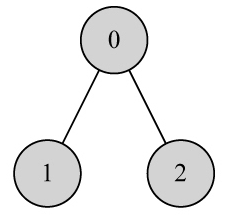

The Max-Cut problem can be written as follows:

Minimize      $Z_0Z_1 + Z_0Z_1$

Subject to     $Z_j \in \{-1,1\},  ~ \forall j$

In [1]:
# If you don't like physics you can skip this paragraph

It can be seen as just a case of an unrelated problem in statistical physics: finding the state of **minimum energy** of an instance of the **Ising Model**, this is a mathematical model for the ferromagnetic interaction of particles with spin, usually arranged in a lattice.  The particle spins are represented by variables $Z_j$ that can take values 1 (spin up) or -1 (spin down).

The total energy of the system is given by a quantity called the Hamiltonian function, so in quantum terms the Math Model above is equivalent to found the ground state of:
$Z_0Z_1 + Z_0Z_1$ which is an Ising Hamiltonian in which $J_{01} = J_{02} = 1$ and the rest of the coeficients are 0.

Finding the state of minimum energy of the system consists in obtaining a spin configuration for which the Hamiltonian function attains its minimum value.

To specify the problem we can use the dimod package included in the D-Wave Ocean library, as follows:

In [2]:
import dimod
J = {(0,1):1, (0,2):1}
h = {}
problem = dimod.BinaryQuadraticModel(h, J, 0.0, dimod.SPIN)
print("The problem we are going to solve is:")
print(problem)


The problem we are going to solve is:
BinaryQuadraticModel({0: 0.0, 1: 0.0, 2: 0.0}, {(1, 0): 1.0, (2, 0): 1.0}, 0.0, 'SPIN')


Note:

 - We used $J$ for the coefficients of the degree 2 terms: (0,1):1 sets the $J_{01}$ coefficient to 1 and (0,2):1 sets the $J_{02}$ coefficient to 1 and $h$ for the linear ones, if we don't specify the coefficients, they are automatically set to 0 by the constructor, but we need to pass both $J$ and $h$ parameters.

 - We used 0.0 as the value for the offset (second parameter) which is a constant term that can be added to the Hamiltonian.
 - We used the dimod.SPIN parameter because we are working with an Ising Hamiltonian, so the values of the variables are 1 and -1.
 
 The following code runs the annealing process on one of the quantum annealers:

In [4]:
# Access the quantum annealers
from dwave.system import DWaveSampler

# Map or embed the problem in the qubits
from dwave.system import EmbeddingComposite

# Create an object sampler
sampler = EmbeddingComposite(DWaveSampler())

# Obtain 10 samples or possible solutions
result = sampler.sample(problem, num_reads=10)
print("The solutions that we have obtained are")
print(result)

The solutions that we have obtained are
   0  1  2 energy num_oc. chain_.
0 +1 -1 -1   -2.0       6     0.0
1 -1 +1 +1   -2.0       4     0.0
['SPIN', 2 rows, 10 samples, 3 variables]


This means that we obtained 2 different solutions $Z_0 = 1$, $Z_1 = -1$, $Z_2 = -1$ and $Z_0 = -1$, $Z_1 = 1$, $Z_2 = 1$ both with energy -2. These two solutions are, the maximum cuts of the graph. As you can easily check the two groups assigned to 1 and -1 in the graph above. 

In [15]:
# We can get additional information from the result

print('The best solution is:\n', result.first)
print ('\n Access Time', result.info['timing']['qpu_access_time'], 'microseconds')

The best solution is:
 Sample(sample={0: 1, 1: -1, 2: -1}, energy=-2.0, num_occurrences=6, chain_break_fraction=0.0)

 Access Time 16479.17 microseconds
